<a href="https://colab.research.google.com/github/csabbadim/MVP-Predi-oSeguroViagem/blob/main/TRAVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## Aula 02: Prática de Machine Learning em Python

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/csabbadim/TravelInsurancePrediction/main/TravelInsurancePrediction.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Employment Type,GraduateOr0t,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.797994 (0.023544)
CART: 0.770293 (0.021308)
NB: 0.754546 (0.032936)
SVM: 0.780985 (0.027750)


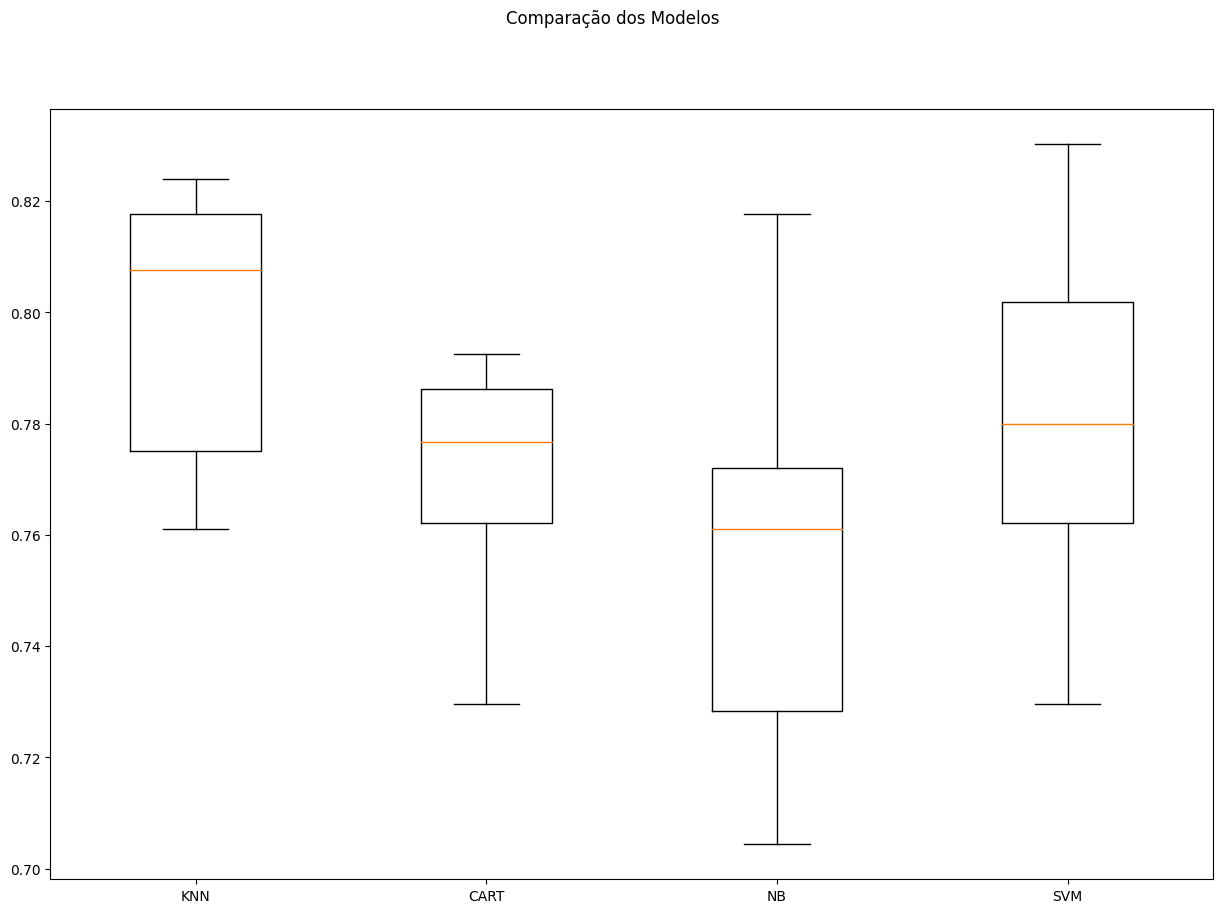

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.798 (0.024)
CART-orig: 0.770 (0.021)
NB-orig: 0.755 (0.033)
SVM-orig: 0.781 (0.028)
KNN-padr: 0.770 (0.034)
CART-padr: 0.769 (0.022)
NB-padr: 0.747 (0.028)
SVM-padr: 0.803 (0.027)
KNN-norm: 0.768 (0.035)
CART-norm: 0.770 (0.025)
NB-norm: 0.747 (0.028)
SVM-norm: 0.778 (0.023)


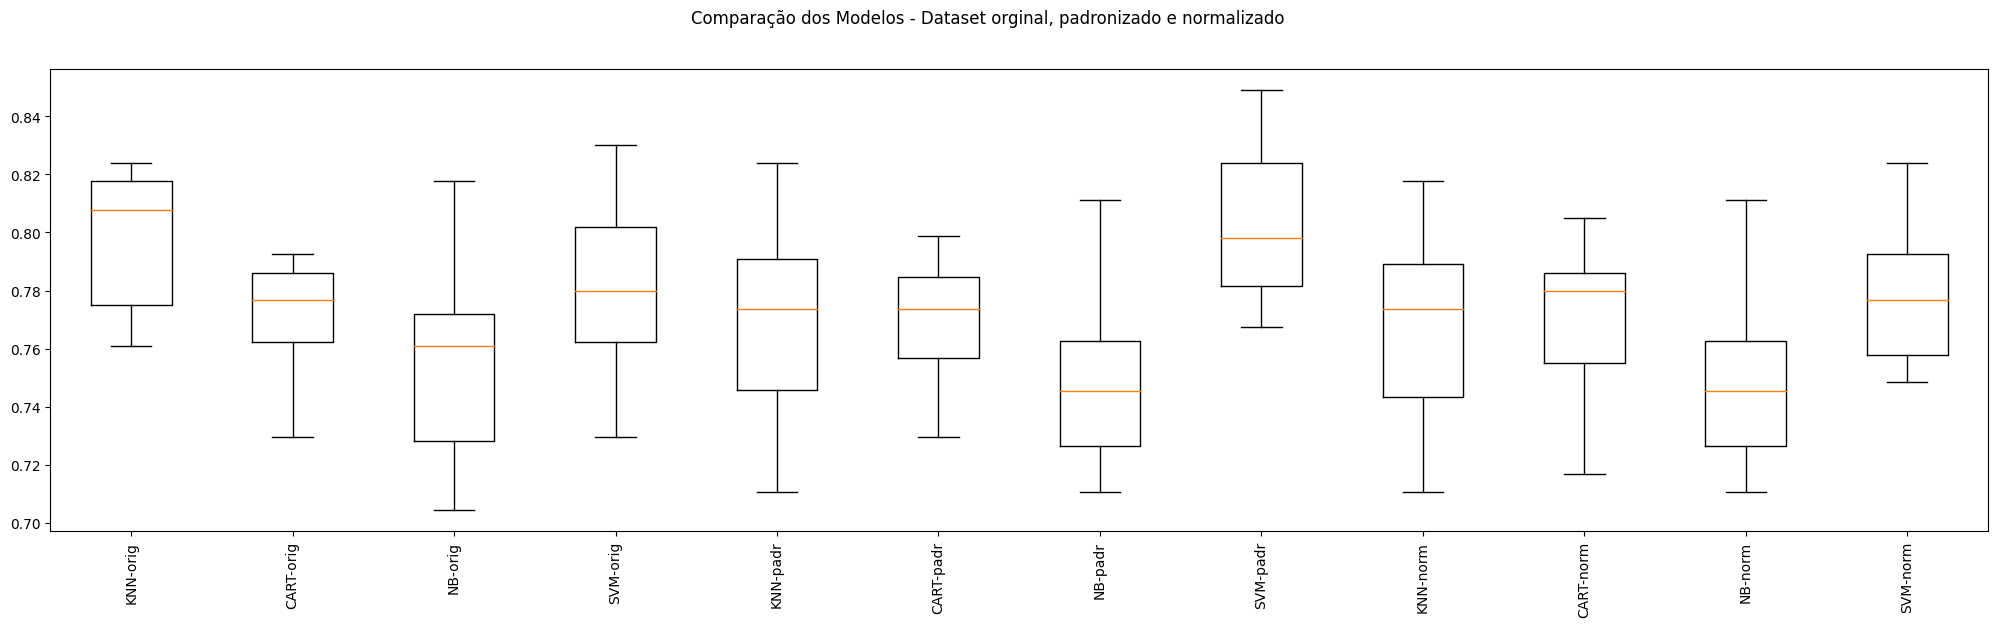

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.809955 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-padr - Melhor: 0.799252 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-norm - Melhor: 0.792946 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
#scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
#rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=15)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
#rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8165829145728644


In [ ]:
# Preparação do modelo com TODO o dataset
#scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
#rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(X, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'Age': [31, 31, 31],
        'Employment Type': [0, 1, 1],
        'GraduateOr0t': [1, 1, 1],
        'AnnualIncome': [400000, 1250000, 1350000],
        'FamilyMembers': [6, 7, 3],
        'FrequentFlyer': [1, 0, 0],
        'ChronicDiseases': [0,0,1],
        'EverTravelledAbroad': [0, 0, 1],
        }

atributos = ['Age','Employment Type','GraduateOr0t','AnnualIncome','FamilyMembers','FrequentFlyer','ChronicDiseases','EverTravelledAbroad']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(int)

# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(X_entrada)
print(X_entrada)

[[     31       0       1  400000       6       1       0       0]
 [     31       1       1 1250000       7       0       0       0]
 [     31       1       1 1350000       3       0       1       1]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[0 0 1]


In [ ]:
# Salvando o modelo treinado em um arquivo
import pickle
pickle_out = open('classificador.pkl','wb')
pickle.dump(model, pickle_out)
pickle_out.close()

O conjunto de dados selecionado para este estudo refere-se a um modelo de predição para seguro de viagens. Inicialmente, procedeu-se com a divisão do conjunto em treino e teste, reservando 20% dos dados para avaliação do desempenho dos modelos. Durante a avaliação dos modelos, observou-se que o algoritmo KNN apresentou um desvio padrão mais consistente (0.79) em comparação com os modelos Decision Tree (CART), Naive Bayes (NB) e Support Vector Machine (SVM).
Ao explorar diferentes transformações nos dados, notou-se que o SVM padronizado alcançou o melhor desvio (0.803), porém, demandou um tempo significativamente maior para processamento. Diante dessa observação, optou-se por realizar a otimização dos hiperparâmetros especificamente para o KNN. Foi escolhido KNN-orig, sem ajustes nos dados, e demonstrando um desvio padrão de 0.809, pelo fato de ser mais rápido e apresentar o melhor desvio padrão em relação aos outros modelos comparados.
Além disso, foi realizada uma simulação utilizando dados não vistos anteriormente. Estes dados foram mantidos no formato original, sem aplicação de padronização ou normalização, e o KNN-orig conseguiu fazer previsões boas, mostrando que ele consegue se dar bem diante de novas situações.
Em resumo, este estudo destaca como é importante escolher o algoritmo certo e mexer nos dados da maneira certa para conseguir bons resultados em previsões. O KNN, quando ajustado e usado sem mudar muito os dados, acabou sendo a melhor escolha para o dataset escolhido.
